# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

    > Récense, Fréquence, Montant

❓ Can you summarize what each metric measures in one sentence?

    > R: date du dernier achat, F: fréquence d'achat sur une période donnée, M: somme des achats sur cette période

❓ What data / or type of data do you need for each metric ? 

    > date, 

Let's explore the dataset!

# Exploratory Data Analysis

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from datetime import timedelta

Load the dataset and start an Exploratory Data Analysis

In [47]:
df = pd.read_csv('db_customers.csv').drop(columns = ['Unnamed: 0', 'customer_id'], axis = 1)
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

    > order_purchase_timestamp, order_delivered_customer_date 	

In [5]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

❓ Which features are Categorical ? List the unique values on these features.

In [18]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ Check for missing values. What do you notice ? 


In [6]:
df.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [17]:
df.loc[df['order_delivered_customer_date'].isnull()]

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
49,49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty
111,111,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies
137,137,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery
164,164,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaN,boleto,1.0,69.12,2,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105250,105250,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


❓ What are the proportions of each `order_status` ? 

In [14]:
df['order_status'].value_counts(normalize = True)

delivered      0.970033
shipped        0.011197
canceled       0.006348
unavailable    0.006177
invoiced       0.003131
processing     0.003046
created        0.000047
approved       0.000019
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

    > approved, created

❓ What feature would you choose in the e-commerce dataset provided? 

In [62]:
df.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name_english', 'most_recent_date'],
      dtype='object')

❓ What method would you use to group the data? 

    > groupby()

❓ What feature would you use to group the data? 

    > customer_unique_id

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

    > datetime – combines date and time information.
      timedelta – represents the difference between two dates or times.

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [63]:
df['order_purchase_timestamp'].groupby('order_id')

KeyError: 'order_id'

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     105383 non-null  int64         
 1   order_id                       105383 non-null  object        
 2   customer_id                    105383 non-null  object        
 3   order_status                   105383 non-null  object        
 4   order_purchase_timestamp       105383 non-null  datetime64[ns]
 5   order_delivered_customer_date  102224 non-null  datetime64[ns]
 6   payment_type                   105382 non-null  object        
 7   payment_installments           105382 non-null  float64       
 8   payment_value                  105382 non-null  float64       
 9   review_score                   105383 non-null  int64         
 10  customer_unique_id             105383 non-null  object        
 11  

❓What is the date of the most recent purchase?

In [35]:
df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

    > To calculate recency, we take one day after the last purchase date of our dataset as the snapshot date

In [6]:
#Pour la récense on groupe par client_id et par la date la plus récente avec max()
last_order = df.groupby(['order_id'])["order_purchase_timestamp"].max()

#On créer un dataframe pour mieux manipuler les données
lo = pd.DataFrame({"order_id" :last_order.index, "date" : last_order.values})

lo["date"] = pd.to_datetime(lo["date"])

lo["last_order"] = lo['date'].max() - lo["date"] 

lo["last_order"] = lo["last_order"].dt.days

In [7]:
#date qu'on utilise pour comparer le dernier achat
snapshot_date = df['order_purchase_timestamp'].max() + timedelta(days = 1)

In [8]:
data_process = df.groupby(['customer_unique_id']).agg({
        'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

    > the lambda function takes the order_purchase_timestamp column of each group as input and returns the number of days between the latest purchase date in that group and a snapshot_date 


In [50]:
snapshot_date

Timestamp('2018-10-18 17:30:18')

In [9]:
#on renomme les colonnes du nouveau DataFrame
data_process.rename(columns = {'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'MonetaryValue'}, inplace = True)

In [10]:
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

                                  Recency  Frequency  MonetaryValue
customer_unique_id                                                 
0000366f3b9a7992bf8c76cfdf3221e2      161          1         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1          27.19
0000f46a3911fa3c0805444483337064      586          1          86.22
0000f6ccb0745a6a4b88665a16c9f078      370          1          43.62
0004aac84e0df4da2b147fca70cf8255      337          1         196.89
96,096 rows; 3 columns


In [11]:
data_process.sort_values(by = 'Frequency', ascending = False)

,Recency,Frequency,MonetaryValue
customer_unique_id,,,
9a736b248f67d166d2fbb006bcb877c3,435,54,394.81
8af7ac63b2efbcbd88e5b11505e8098a,546,29,457.99
569aa12b73b5f7edeaa6f2a01603e381,498,26,62.68
1d2435aa3b858d45c707c9fc25e18779,639,24,233.70
90807fdb59eec2152bc977feeb6e47e7,327,24,215.70
...,...,...,...
57cd75ea0d4df751cb635cbae8596411,374,1,158.09
57cd06ab5e1452f461555dda1deb3d5c,257,1,124.27
57cce8aaddd9bf6acc0d54ffdd68a0ac,84,1,350.34


In [15]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1)
f_labels = range(1, 4)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q = 3, labels = r_labels)
f_groups = pd.qcut(data_process['Frequency'], q = 3, labels = f_labels)

# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

ValueError: Bin edges must be unique: array([ 1.,  1.,  1., 54.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [17]:
data_process['R'] = pd.cut(data_process['Recency'] ,bins = [0, 269, 398, 774], labels = [3,2,1])
data_process['F'] = pd.cut(data_process['Frequency'] , bins = [0, 1, 5, 55], labels = [1,2,3])
data_process['M'] = pd.cut(data_process['MonetaryValue'] , bins = [-1, 108, 185, 13666], labels = [1,2,3])

In [18]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,1,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,1,1,1
0000f46a3911fa3c0805444483337064,586,1,86.22,3,1,1
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,3,1,3
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,2,1,1
ffff371b4d645b6ecea244b27531430a,618,1,112.46,3,1,2


In [19]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis = 1)

In [20]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,1,1,2,1.01.02.0
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,1,1,1,1.01.01.0
0000f46a3911fa3c0805444483337064,586,1,86.22,3,1,1,3.01.01.0
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,2.01.01.0
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3,2.01.03.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,3,1,3,3.01.03.0
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,2,1,1,2.01.01.0
ffff371b4d645b6ecea244b27531430a,618,1,112.46,3,1,2,3.01.02.0


In [21]:
# Count num of unique segments
rfm_count_unique = data_process.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

27


In [23]:
data_process.RFM_Segment_Concat.value_counts()

1.01.01.0    22653
3.01.01.0    11797
1.01.02.0    11699
2.01.01.0    11628
1.01.03.0    10486
2.01.02.0     5648
3.01.02.0     5352
2.01.03.0     5187
3.01.03.0     5180
1.02.03.0     1686
1.02.01.0      795
2.02.03.0      784
1.02.02.0      682
3.02.03.0      682
3.02.01.0      511
2.02.01.0      459
3.02.02.0      365
2.02.02.0      327
1.03.03.0       40
3.03.03.0       31
3.03.01.0       23
1.03.01.0       21
2.03.03.0       18
3.03.02.0       13
2.03.01.0       13
1.03.02.0       13
2.03.02.0        3
Name: RFM_Segment_Concat, dtype: int64

In [24]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,1,1,2,1.01.02.0
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,1,1,1,1.01.01.0
0000f46a3911fa3c0805444483337064,586,1,86.22,3,1,1,3.01.01.0
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,2.01.01.0
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3,2.01.03.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,3,1,3,3.01.03.0
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,2,1,1,2.01.01.0
ffff371b4d645b6ecea244b27531430a,618,1,112.46,3,1,2,3.01.02.0


In [25]:
data_process = data_process.astype({'R':'int'})
data_process = data_process.astype({'F':'int'})
data_process = data_process.astype({'M':'int'})

In [34]:
data_process['RFM_Score'] = 0.15 * data_process['R'] + 0.28 * \
    data_process['F'] + 0.57 * data_process['M']
data_process['RFM_Score'] *= 3
data_process = data_process.round(2)
data_process.describe()
#data_process[['customer_unique_id', 'RFM_Score']].describe()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320,1.748991,1.069108,1.752269,4.681476
std,153.414676,0.534676,237.929113,0.828586,0.260720,0.829352,1.507539
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,164.000000,1.000000,63.220000,1.000000,1.000000,1.000000,3.450000
50%,269.000000,1.000000,108.300000,1.000000,1.000000,2.000000,4.710000
75%,398.000000,1.000000,185.495000,2.000000,1.000000,3.000000,6.420000
max,773.000000,54.000000,13664.080000,3.000000,3.000000,3.000000,9.000000


In [35]:
data_process.dtypes

Recency                 int64
Frequency               int64
MonetaryValue         float64
R                       int64
F                       int64
M                       int64
RFM_Segment_Concat     object
RFM_Score             float64
dtype: object

In [32]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,1,1,2,1.01.02.0,4.71
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,1,1,1,1.01.01.0,3.00
0000f46a3911fa3c0805444483337064,586,1,86.22,3,1,1,3.01.01.0,3.90
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,2.01.01.0,3.45
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3,2.01.03.0,6.87
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,3,1,3,3.01.03.0,7.32
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,2,1,1,2.01.01.0,3.45
ffff371b4d645b6ecea244b27531430a,618,1,112.46,3,1,2,3.01.02.0,5.61


In [36]:
data_process = data_process.astype({'RFM_Score':'int'})

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

    > order_purchase_timestamp: Recency
      order_id: Frequency
      payment_value: MonetaryValue

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [46]:
data_process.describe()

,Recency,Frequency,MonetaryValue
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320
std,153.414676,0.534676,237.929113
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,63.220000
50%,269.000000,1.000000,108.300000
75%,398.000000,1.000000,185.495000
max,773.000000,54.000000,13664.080000


Now that you have clusters for each category, explain the different buying behaviors

___________

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

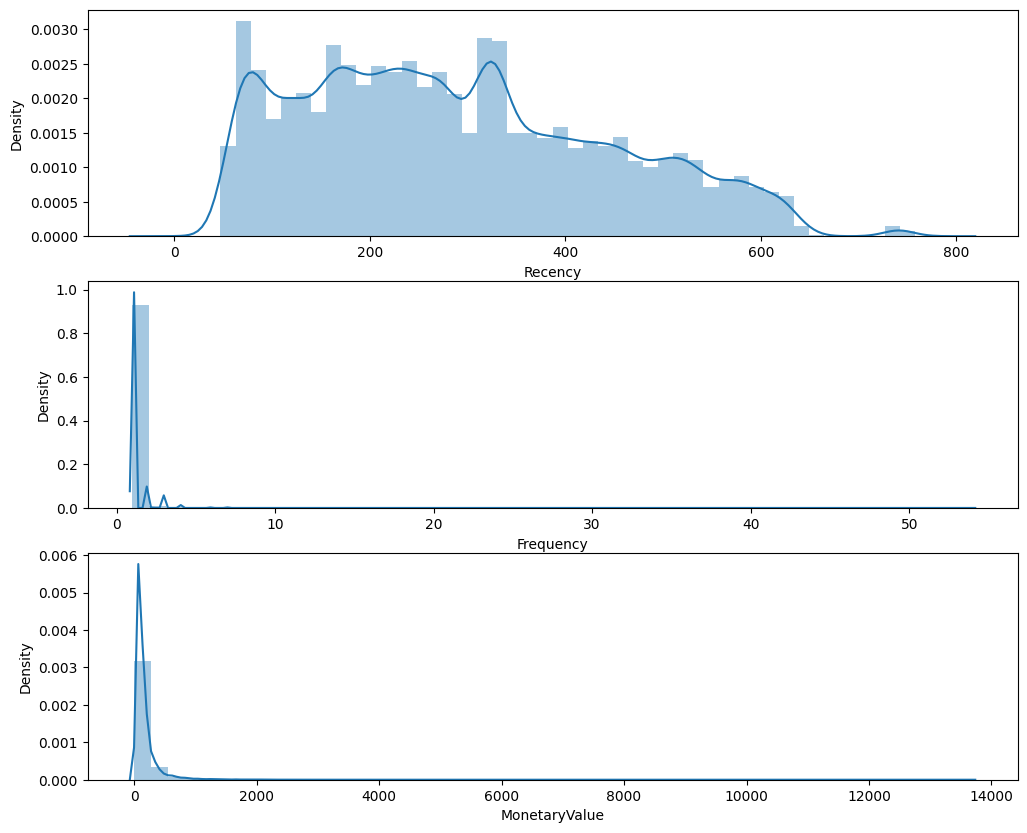

In [59]:
plt.figure(figsize = (12, 10))

plt.subplot(3, 1, 1)
sns.distplot(data_process['Recency'])

plt.subplot(3, 1, 2)
sns.distplot(data_process['Frequency'])

plt.subplot(3, 1, 3)
sns.distplot(data_process['MonetaryValue'])

    > .qcut(): quantile-based discretization function

# Working with cohorts

❓What is a cohort? 

    > Une cohorte désigne un ensemble d'individus ayant vécu un même événement au cours d'une même période.  

❓Why is it interesting to analyse cohorts ? 

    > In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.  
    Cohort analysis can also help to observe the impact of changes to the product on the user behavior.

❓What data (already existing in the original dataset) do we need to build a cohort? 

    > order_id, customer_unique_id, order_purchase_timestamp

Build a new df with just these 3 features

In [77]:
n_orders = df.groupby(['customer_unique_id'])['order_purchase_timestamp'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['order_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

2.76% of customers ordered more than once.


[Text(0.5, 1.0, 'Distribution of number of orders per customer'),
 Text(0.5, 0, '# of orders'),
 Text(0, 0.5, '# of customers')]

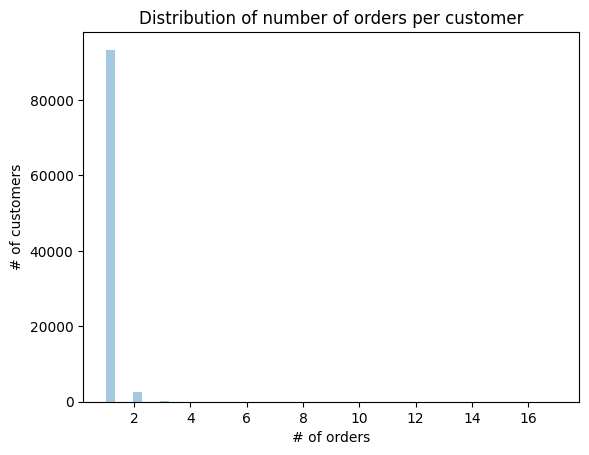

In [78]:
ax = sns.distplot(n_orders, kde = False, hist = True)
ax.set(title = 'Distribution of number of orders per customer',
       xlabel = '# of orders', 
       ylabel = '# of customers')

In [40]:
new_df = df[['order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates()

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [41]:
new_df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [42]:
new_df['order_purchase_timestamp'].dt.to_period(freq = 'M')

0         2017-10
3         2018-07
4         2018-08
5         2017-11
6         2018-02
           ...   
105378    2017-03
105379    2018-02
105380    2017-08
105381    2018-01
105382    2018-03
Name: order_purchase_timestamp, Length: 99441, dtype: period[M]

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and transforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [45]:
#for the teachers, To filter by only the customer that have done 2 or more purchases
"""df_more = pd.DataFrame(new_df.groupby('customer_unique_id').size()[new_df.groupby('customer_unique_id').size() > 1])
new_df = new_df.merge(df_more, how = 'left', on = 'customer_unique_id').rename(columns = {0:'na'}, inplace = True)

new_df = new_df[new_df['na'].notna()]"""

"df_more = pd.DataFrame(new_df.groupby('customer_unique_id').size()[new_df.groupby('customer_unique_id').size() > 1])\nnew_df = new_df.merge(df_more, how = 'left', on = 'customer_unique_id').rename(columns = {0:'na'}, inplace = True)\n\nnew_df = new_df[new_df['na'].notna()]"

In [44]:
new_df['cohort'] = new_df.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
new_df

,order_id,customer_unique_id,order_purchase_timestamp,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08
5,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11
6,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02
...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03
105379,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02
105380,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08
105381,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

In [ ]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()